# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [37]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [27]:
# Use our wrangle function to acquire and prepare our data.
grades = pd.read_csv('student_grades - Sheet1.csv')

In [29]:
#look at your data!
for col in grades:
    grades[col] = grades[col].astype(int)
grades.exam1 = grades.exam1.fillna(round(grades.exam1.mean(), 1))
grades.exam3 = grades.exam3.fillna(round(grades.exam3.mean(), 1))

In [32]:
train_val, test = train_test_split(grades,
                                   train_size=0.8,
                                   random_state=1349)
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349)

In [33]:
train.shape, validate.shape, test.shape

((58, 5), (25, 5), (21, 5))

In [34]:
columns = train.drop(columns=['final_grade', 'student_id']).columns.to_list()

In [35]:
train_scaled = train.copy()

In [38]:
train_scaled = MinMaxScaler().fit_transform(train.drop(
    columns=['final_grade', 'student_id']))

In [40]:
x_train, y_train = train[columns], train[['final_grade']]

In [41]:
x_train.head()

,exam1,exam2,exam3
90,70,75,78
15,85,83,87
55,83,80,86
75,58,65,70
25,70,75,78


#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

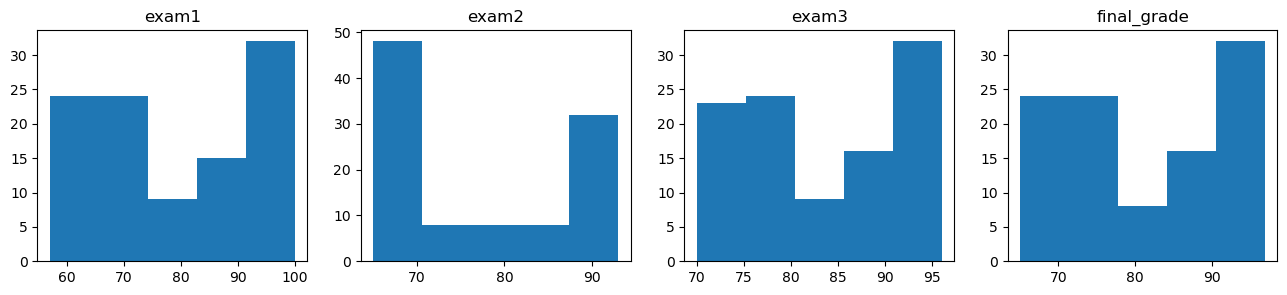

In [43]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    grades[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

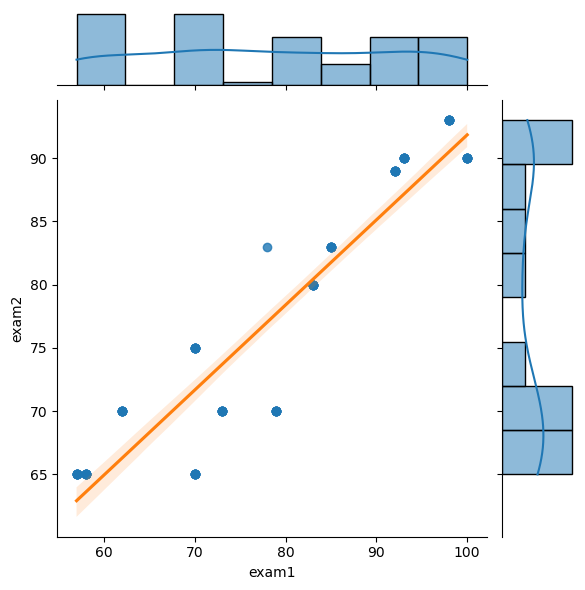

In [51]:
sns.jointplot(data=grades, x='exam1', y='exam2', line_kws={'color':'C1'}, kind='reg')
plt.show()

In [44]:
def quantitative(df):
    '''
    Takes in a dataframe and gets all of the float and int dtype columns then 
    returns a histogram, boxplot, and a .describe for each column
    '''
    quantitative_col = df.select_dtypes(include=['float', 'int'])
    for col in quantitative_col:
        sns.histplot(quantitative_col[col])
        plt.title(f'Distribution of {col}')
        plt.show()
        sns.boxplot(quantitative_col[col])
        plt.title(f'Distribution of {col}')
        plt.show()
        print(quantitative_col[col].describe().to_markdown())
        print('\n=======================================================\n')

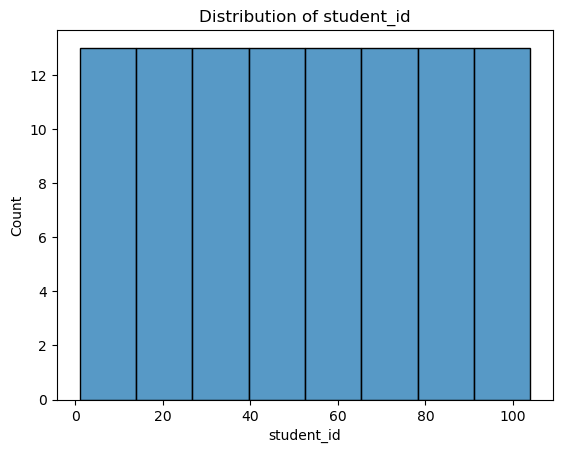

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


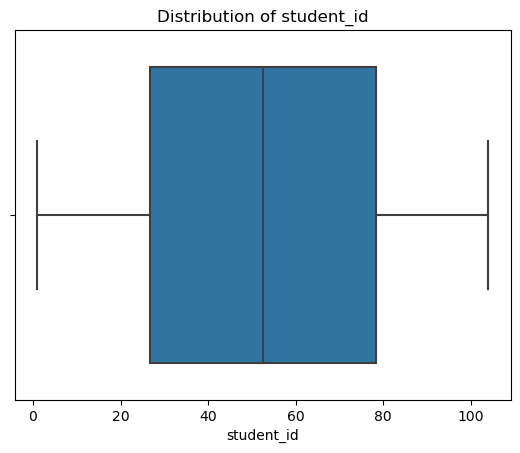

|       |   student_id |
|:------|-------------:|
| count |     104      |
| mean  |      52.5    |
| std   |      30.1662 |
| min   |       1      |
| 25%   |      26.75   |
| 50%   |      52.5    |
| 75%   |      78.25   |
| max   |     104      |




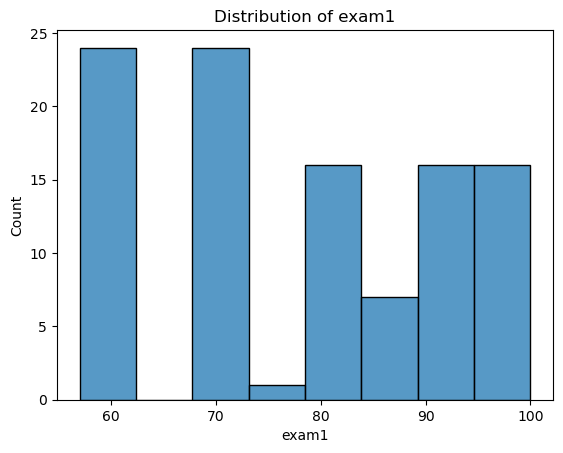

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


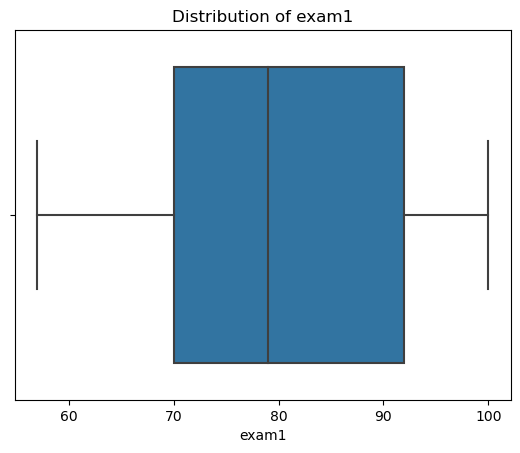

|       |    exam1 |
|:------|---------:|
| count | 104      |
| mean  |  78.3942 |
| std   |  14.2702 |
| min   |  57      |
| 25%   |  70      |
| 50%   |  79      |
| 75%   |  92      |
| max   | 100      |




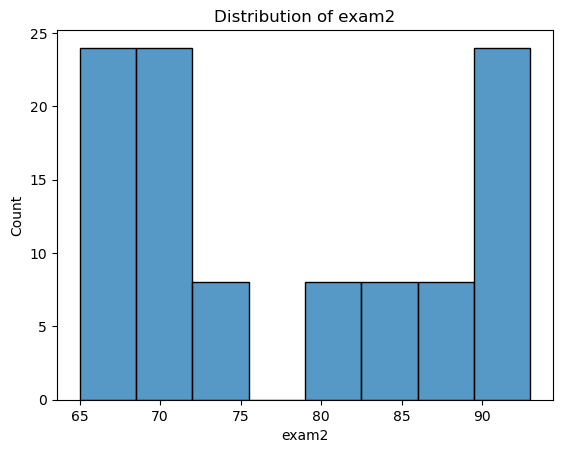

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


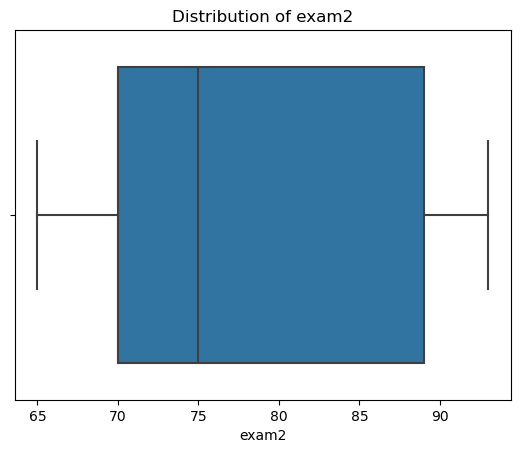

|       |    exam2 |
|:------|---------:|
| count | 104      |
| mean  |  77.3077 |
| std   |  10.2957 |
| min   |  65      |
| 25%   |  70      |
| 50%   |  75      |
| 75%   |  89      |
| max   |  93      |




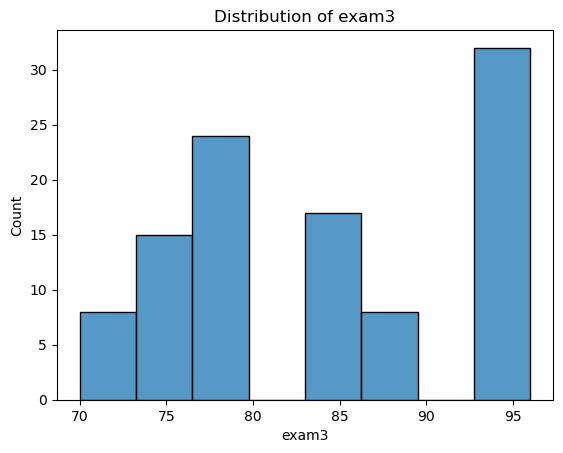

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


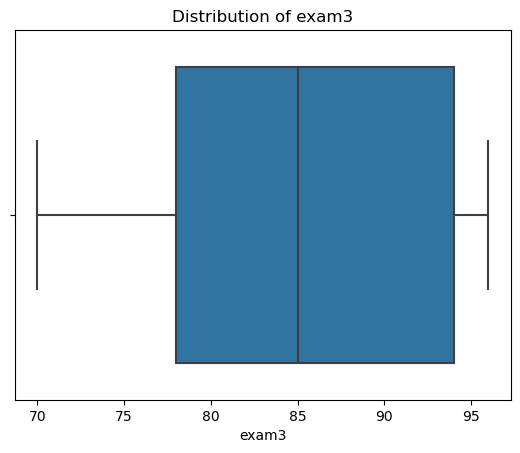

|       |     exam3 |
|:------|----------:|
| count | 104       |
| mean  |  84.2404  |
| std   |   8.66697 |
| min   |  70       |
| 25%   |  78       |
| 50%   |  85       |
| 75%   |  94       |
| max   |  96       |




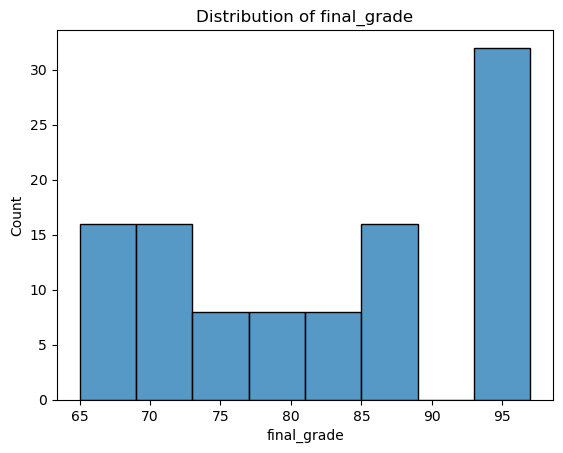

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


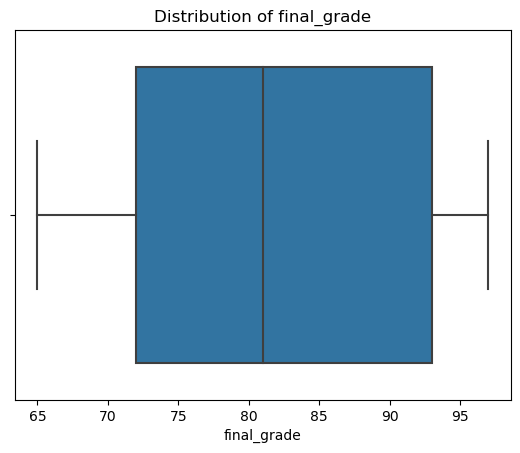

|       |   final_grade |
|:------|--------------:|
| count |      104      |
| mean  |       81.6923 |
| std   |       10.9181 |
| min   |       65      |
| 25%   |       72      |
| 50%   |       81      |
| 75%   |       93      |
| max   |       97      |




In [45]:
quantitative(grades)

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no there linear correlation between exam1 and final_grade
- ${H_a}$:  there is a linear correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [54]:
exam_corr = train.drop(columns='student_id').corr(method='spearman')

In [55]:
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.914593,0.899207,0.965675
exam2,0.914593,1.000000,0.920229,0.874022
exam3,0.899207,0.920229,1.000000,0.926075
final_grade,0.965675,0.874022,0.926075,1.000000


In [ ]:
# create the correlation matrix using pandas .corr()


<AxesSubplot:>

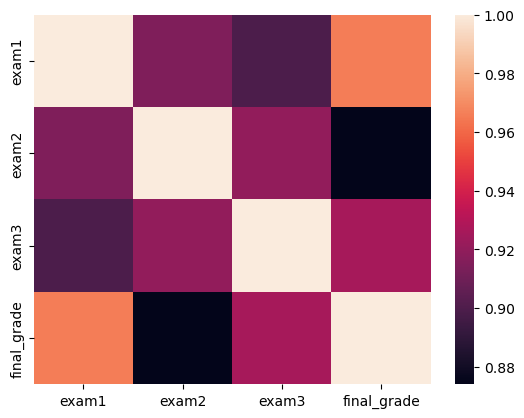

In [56]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

In [57]:
np.triu(exam_corr)

array([[1.        , 0.91459273, 0.89920697, 0.96567508],
       [0.        , 1.        , 0.9202292 , 0.87402175],
       [0.        , 0.        , 1.        , 0.92607451],
       [0.        , 0.        , 0.        , 1.        ]])

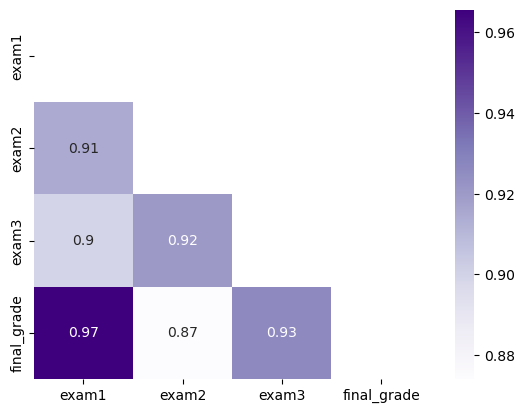

In [62]:
sns.heatmap(exam_corr,
            cmap='Purples',
            annot=True,
            mask=np.triu(exam_corr))
plt.show()

In [ ]:
# pass my correlation matrix to Seaborn's heatmap with customization


<AxesSubplot:>

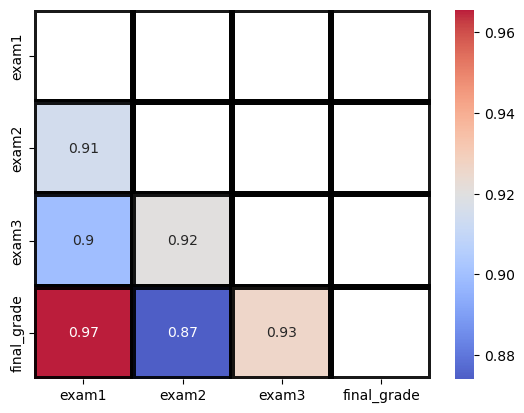

In [63]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}
sns.heatmap(exam_corr,
            cmap='coolwarm',
            annot=True,
            mask=np.triu(exam_corr),
            **kwargs)

### Test Hypothesis

In [65]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train['exam1'], train['final_grade'])

In [66]:
if p < 0.05:
    print('We can reject our null hypothesis!')
else:
    print('We failed to reject the null hypothesis!')

We can reject our null hypothesis!


In [67]:
r

0.9656750817544086

In [68]:
p

1.8027312193874725e-34

#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

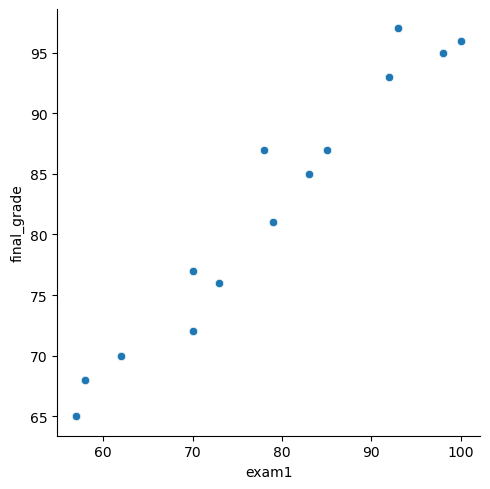

In [70]:
sns.relplot(data=train,
            x='exam1',
            y='final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

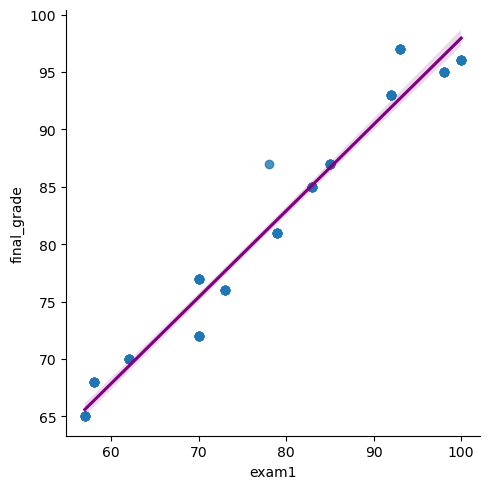

In [76]:
# I can really pop that line color if I want
sns.lmplot(data=grades,
           x='exam1',
           y='final_grade',
           line_kws={'color':'purple'})
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

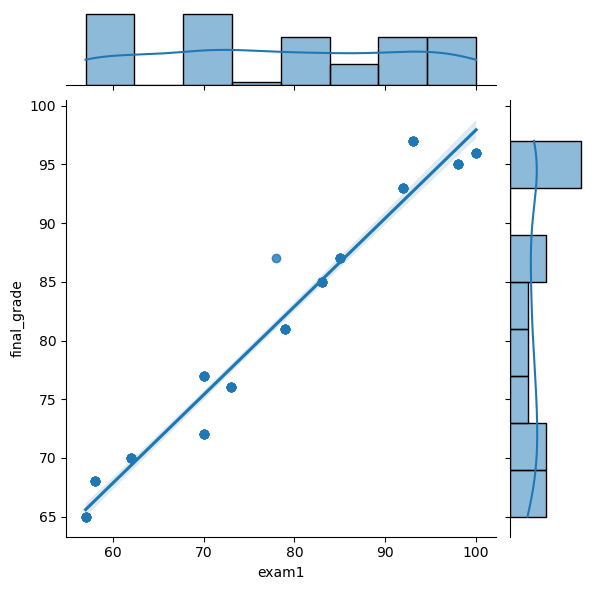

In [78]:
sns.jointplot(data=grades,
              x='exam1',
              y='final_grade',
              kind='reg')
plt.show()

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

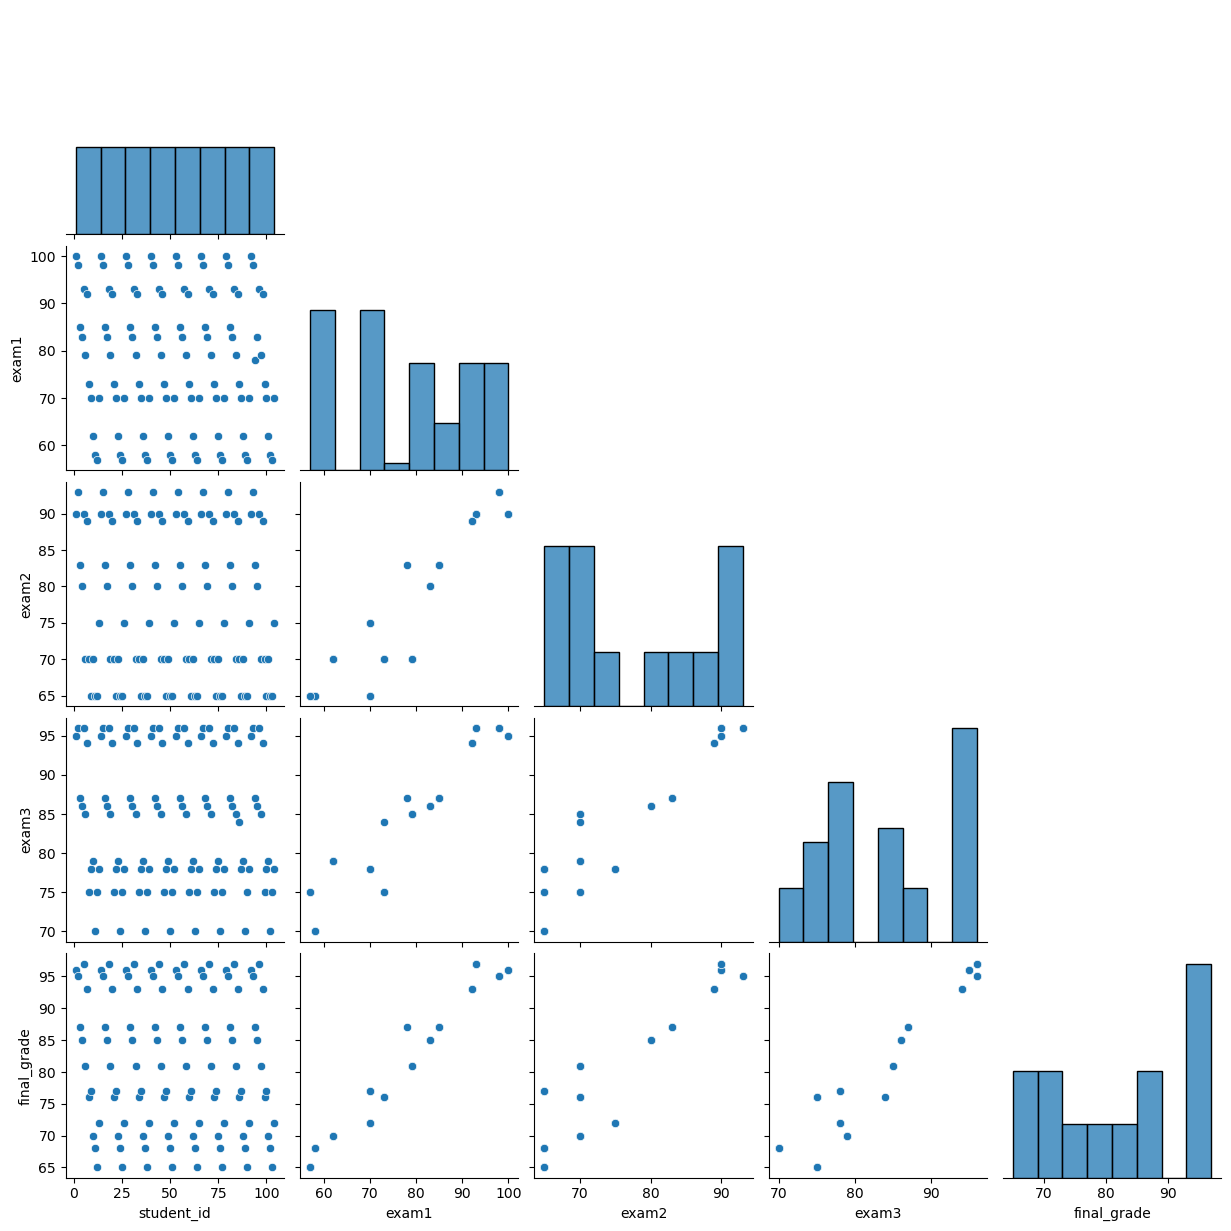

In [75]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=grades, corner=True)
plt.show()

Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [ ]:
#number of people who failed each test


In [81]:
for col in grades.drop(columns='student_id'):
    num = (train[col] < 70).sum()
    total = len(train)
    print(f'{num} out of {total} students failed {col}')

12 out of 58 students failed exam1
13 out of 58 students failed exam2
0 out of 58 students failed exam3
8 out of 58 students failed final_grade


### Make categorical values for further exploration

In [ ]:
#assign fail and pass for each test

### Whats the relationship between passing exam1 and the final_exam grade?

In [ ]:
#seaborn histplot 


In [ ]:
#mean final_grade by exam1 pass/fail status


### What percentage of students failed exam1 and the final?

### Of the students who failed exam1, how many also failed the final?

In [ ]:
#create subset of people who failed exam1


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed both exam1 and exam2, how many also failed the final?

In [ ]:
#create subset of people who failed exam2


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 